<a href="https://colab.research.google.com/github/Shreyas55555/CS_dept/blob/main/exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


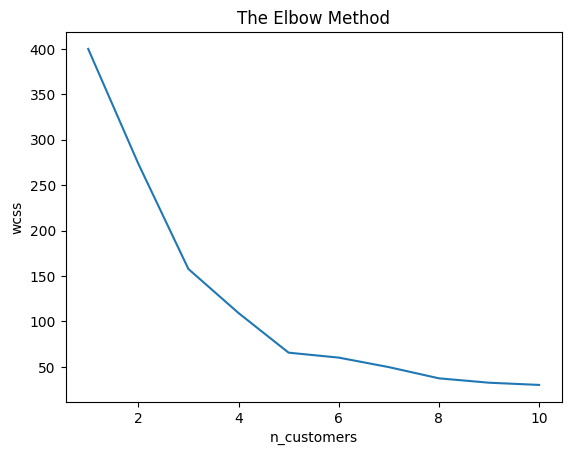

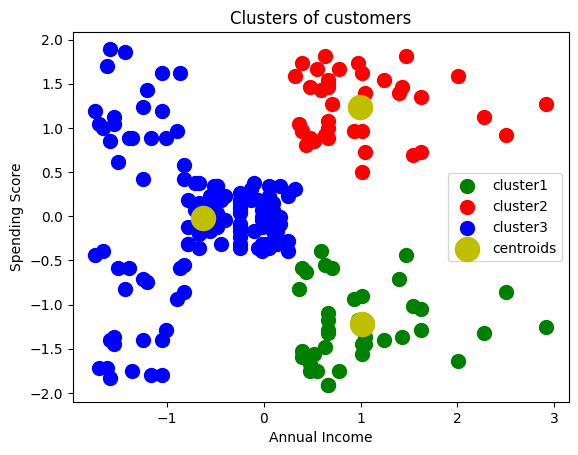

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Mall_Customers.csv')
print(data.head())
print(data.isnull().sum())

x = data.iloc[:, [3, 4]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

wcss_list = []
for i in range(1, 11):
    kMeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kMeans.fit(X_scaled)
    wcss_list.append(kMeans.inertia_)

plt.plot(range(1, 11), wcss_list)
plt.xlabel('n_customers')
plt.ylabel('wcss')
plt.title('The Elbow Method')
plt.show()
kMeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kMeans = kMeans.fit_predict(X_scaled)
plt.scatter(X_scaled[y_kMeans == 0, 0], X_scaled[y_kMeans == 0, 1], s=100, color='g',label='cluster1')
plt.scatter(X_scaled[y_kMeans == 1, 0], X_scaled[y_kMeans == 1, 1], s=100, color='r',label='cluster2')
plt.scatter(X_scaled[y_kMeans == 2, 0], X_scaled[y_kMeans == 2, 1], s=100, color='b',label='cluster3')
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], s=300, color='y',label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()